# Detection of Phishing URLs Using Machine Learning Techniques

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\WELCOME\Desktop\Workshop\phishing_site_urls.csv")

In [2]:
df

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [3]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
df.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [5]:
df.columns

Index(['URL', 'Label'], dtype='object')

In [6]:
df.dtypes

URL      object
Label    object
dtype: object

In [27]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [9]:
df['Label'].value_counts()

Label
good    392924
bad     156422
Name: count, dtype: int64

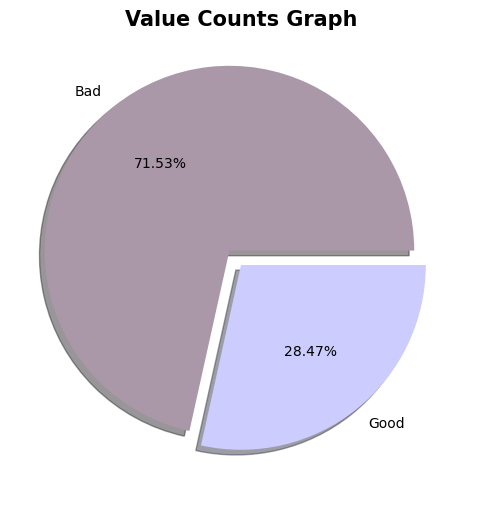

In [37]:
import matplotlib.pyplot as plt 

value_counts = df['Label'].value_counts()
labels = ['Bad', 'Good']
colors = ['#AA98A9', '#CCCCFF']

plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, colors=colors, autopct='%1.2f%%', explode=(0.1, 0), shadow=True)
plt.title('Value Counts Graph',fontweight='bold', fontsize=15)
plt.show()



In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Label'] = le.fit_transform(df['Label'])


In [12]:
df['Label'].value_counts()

Label
1    392924
0    156422
Name: count, dtype: int64

In [13]:
Bad_df = df[df['Label'] == 0].sample(n=10000, random_state=42)
Good_df = df[df['Label'] == 1].sample(n=10000, random_state=42)

balanced_df = pd.concat([Bad_df, Good_df])

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['Label'].value_counts())


Label
1    10000
0    10000
Name: count, dtype: int64


In [14]:
balanced_df

,URL,Label
0,trumpetmaster.com/vb/f134/jon-faddis-schilke-m...,1
1,towingelkhart.com/wp-admin/includes/new/,0
2,jeffgrayrealty.com/wp-admin/images/dropbox/dro...,0
3,bYuJyyHQqvAF0tt.edu/Rnv7VG1sv%7EGuFK6%26lSEZ/H...,0
4,www.picgames.com/mytheme/,1
...,...,...
19995,linkedin.com/directory/people/budd-2.html,1
19996,sportsillustrated.cnn.com/baseball/mlb/stats/a...,1
19997,www.paypal.ca.9911.secure6v.mx/images/cgi.bin/...,0
19998,arvindudyog.com/bright/bright/drake/bright/690...,0


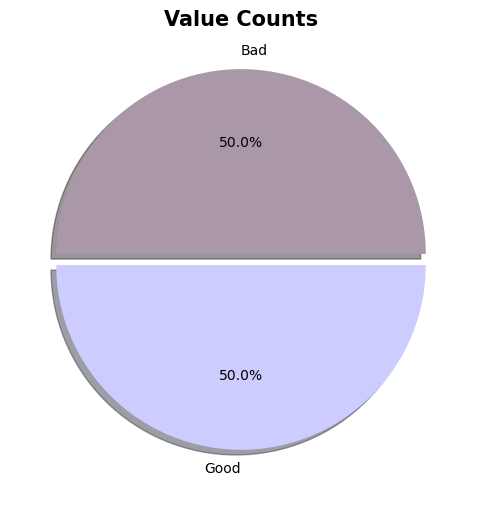

In [15]:
import matplotlib.pyplot as plt 

value_counts = balanced_df['Label'].value_counts()
labels = ['Bad', 'Good']
colors = ['#AA98A9', '#CCCCFF']

plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, colors=colors, autopct='%1.1f%%', explode=(0.06, 0), shadow=True)
plt.title('Value Counts',fontweight='bold', fontsize=15)
plt.ylabel('') 
plt.show()



In [16]:
X = balanced_df['URL']
y = balanced_df['Label']

In [17]:
X

0        trumpetmaster.com/vb/f134/jon-faddis-schilke-m...
1                 towingelkhart.com/wp-admin/includes/new/
2        jeffgrayrealty.com/wp-admin/images/dropbox/dro...
3        bYuJyyHQqvAF0tt.edu/Rnv7VG1sv%7EGuFK6%26lSEZ/H...
4                                www.picgames.com/mytheme/
                               ...                        
19995            linkedin.com/directory/people/budd-2.html
19996    sportsillustrated.cnn.com/baseball/mlb/stats/a...
19997    www.paypal.ca.9911.secure6v.mx/images/cgi.bin/...
19998    arvindudyog.com/bright/bright/drake/bright/690...
19999    hispanicbusiness.com/news/2008/5/6/krzz_933_fm...
Name: URL, Length: 20000, dtype: object

In [18]:
y

0        1
1        0
2        0
3        0
4        1
        ..
19995    1
19996    1
19997    0
19998    0
19999    1
Name: Label, Length: 20000, dtype: int32

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)


In [20]:
print(X_vectorized.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)


In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 5000)
(4000, 5000)
(16000,)
(4000,)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.87875
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2055
           1       0.84      0.92      0.88      1945

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



In [24]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\WELCOME\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:51:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.84375
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2055
           1       0.80      0.91      0.85      1945

    accuracy                           0.84      4000
   macro avg       0.85      0.85      0.84      4000
weighted avg       0.85      0.84      0.84      4000



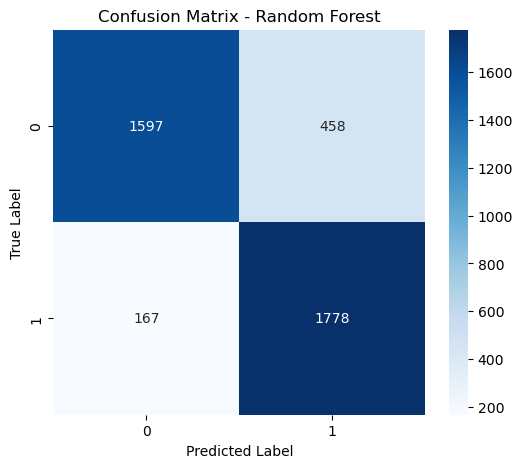

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

class_names = ['Bad', 'Good']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [26]:
import joblib
joblib.dump(clf, "phishing_url_detector.pkl")
joblib.dump(vectorizer, "url_vectorizer.pkl")


['url_vectorizer.pkl']

In [5]:
import joblib

# Load model and vectorizer
model = joblib.load("phishing_url_detector.pkl")
vectorizer = joblib.load("url_vectorizer.pkl")


In [6]:
def predict_phishing(url):
    try:
        vect_url = vectorizer.transform([url])
        prediction = model.predict(vect_url)[0]
        return "Phishing Site" if prediction == 0 else "Legitimate Site"
    except Exception as e:
        return f"Error: {str(e)}"


In [7]:
import gradio as gr

# Create Gradio interface
iface = gr.Interface(
    fn=predict_phishing,
    inputs=gr.Textbox(lines=1, placeholder="Enter URL here...", label="URL"),
    outputs=gr.Textbox(label="Prediction"),
    title="Phishing URL Detector",
    description="Enter a URL to check whether it's a phishing or legitimate site."
)

# Launch the interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
